Authors:
Goto, Ipei B.
Quinto, Christopher A.
Talato, Joshua P.

Acronyms : 
- THI = Total Household Income

Objective: 
1. Explore the data set.
    - See which attributes are continuous / categorial.
        - Visually represent them.
    - Identify which attributes of a household has a relationship with THI.
        - Correctly identify if attributes that has correlations with THI are solely region based or nationwide.

3. Visualize the relationship in a graphical manner

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import zscore

In [2]:
df = pd.read_csv("Family Income and Expenditure.csv")

Measuring the data

- There are 41,544 rows. with 60 columns!

In [3]:
df.shape

(41544, 60)

Data types Categorical or Continous


In [4]:
print(df.dtypes)

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

Now let's remove outliers.  
remove all rows that have outliers in at least one column.

Outliers ALWAYS MESS UP THE TRAINING OF THE MODEL. Therefore, it is imperative that we remove such outliers

>( < 3).all(axis=1) checks if, for each row, all column values are within 3 standard deviations from the mean   
>Removes approximately 0.3% of data points

Only pick the int64, i.e the continous variable types.

Create a correlation matrix.

See which ones correlate the most with Total Household Icome

> note that this is for all regions of the Philippines. this is going to be a one size fits all approach.

In [ ]:
philippine_regions = {
    'NCR': (14.5995, 120.9842),  # Manila
    'CAR': (16.4023, 120.5960),  # Baguio City
    'Region I': (16.6499, 120.3352),  # San Fernando, La Union
    'Region II': (16.6799, 121.7700),  # Tuguegarao City
    'Region III': (15.1349, 120.5698),  # City of San Fernando, Pampanga
    'Region IV-A': (14.3189, 121.1863),  # Calamba, Laguna
    'MIMAROPA': (13.1681, 121.2461),  # Calapan City, Oriental Mindoro
    'Region V': (13.6380, 123.1854),  # Legazpi City
    'Region VI': (10.7200, 122.5621),  # Iloilo City
    'Region VII': (10.3482, 123.8902),  # Cebu City
    'Region VIII': (11.2448, 125.0064),  # Tacloban City
    'Region IX': (8.9500, 125.0667),  # Zamboanga City
    'Region X': (8.4542, 124.6319),  # Cagayan de Oro City
    'Region XI': (7.0664, 125.5928),  # Davao City
    'Region XII': (6.9175, 125.1491),  # Koronadal City
    'Region XIII': (9.3054, 126.0379),  # Surigao City
    'BARMM': (7.8624, 124.4452)  # Cotabato City
}

# Add coordinates to your dataframe
df['latitude'] = df['Region'].map(
    lambda x: philippine_regions.get(x, (0, 0))[0])
df['longitude'] = df['Region'].map(lambda x: philippine_regions.get(x, (0, 0))[1])

### Justification for using Cities.  
1. Consistent representation
2. Administrative significance
3. Captures regional centrality
4. Enables spatial analysis techniques

Now, to justify why we removed the columns shown below,  
It is because we are currently only looking to develop a model based on expenditure types.

C:\Users\Ippei\AppData\Local\Temp\ipykernel_22312\2081981704.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_df_no_outliers['Region'] = region_column[outlier_mask]
C:\Users\Ippei\AppData\Local\Temp\ipykernel_22312\2081981704.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_df_no_outliers['longitude'] = longitude_column[outlier_mask]
C:\Users\Ippei\AppData\Local\Temp\ipykernel_22312\2081981704.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

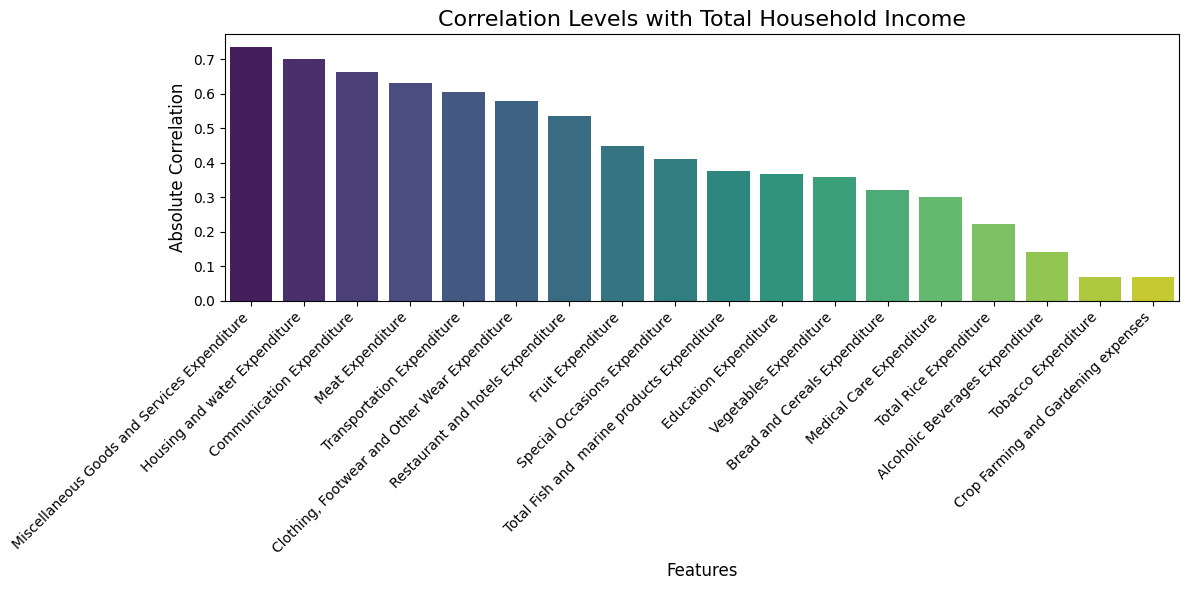

In [ ]:
# List of columns to drop
dropped_columns = [
    'Total Number of Family members',
    'Members with age less than 5 year old',
    'Members with age 5 - 17 years old',
    'Total number of family members employed',
    'House Floor Area',
    'House Age',
    'Number of bedrooms',
    'Electricity',
    'Number of Television',
    'Number of CD/VCD/DVD',
    'Number of Component/Stereo set',
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Car, Jeep, Van',
    'Number of Landline/wireless telephones',
    'Number of Cellular phone',
    'Number of Personal Computer',
    'Number of Stove with Oven/Gas Range',
    'Number of Motorized Banca',
    'Number of Motorcycle/Tricycle',
    'Household Head Age',
    'Agricultural Household indicator',
    'Imputed House Rental Value',
    'Total Income from Entrepreneurial Acitivites',
    'Main Source of Income',
    'Household Head Sex',
    'Household Head Marital Status',
    'Household Head Highest Grade Completed',
    'Household Head Job or Business Indicator',
    'Household Head Occupation',
    'Household Head Class of Worker',
    'Type of Household',
    'Type of Building/House',
    'Type of Roof',
    'Type of Walls',
    'Tenure Status',
    'Toilet Facilities',
    'Main Source of Water Supply',
    'Total Food Expenditure'
]

# Separate the 'Region', 'Longitude', and 'Latitude' columns
region_column = df['Region']
longitude_column = df['longitude']
latitude_column = df['latitude']

# Drop the specified columns to keep only continuous numerical columns
continous_df = df.drop(columns=dropped_columns, axis=1)

# Remove outliers only from the numerical columns, excluding 'Longitude' and 'Latitude'
numeric_columns = continous_df.select_dtypes(include=[np.number]).columns
numeric_columns_to_filter = numeric_columns.difference(
    ['longitude', 'latitude'])

# Filter rows based on z-scores (outlier removal)
outlier_mask = (
    np.abs(zscore(continous_df[numeric_columns_to_filter])) < 3).all(axis=1)
continous_df_no_outliers = continous_df[outlier_mask]

# Add back the 'Region', 'Longitude', and 'Latitude' columns to the filtered dataframe
continous_df_no_outliers['Region'] = region_column[outlier_mask]
continous_df_no_outliers['longitude'] = longitude_column[outlier_mask]
continous_df_no_outliers['latitude'] = latitude_column[outlier_mask]

# Compute correlation matrix for numerical columns, excluding 'Longitude' and 'Latitude'
corr = continous_df_no_outliers[numeric_columns_to_filter].corr()

# For simplicity, we calculate correlation with a target variable (e.g., the first column in numeric columns)
target_column = 'Total Household Income'
correlations = corr[target_column].drop(target_column)  # Drop self-correlation

# Sort correlations by absolute value, descending
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations_sorted.index,
            y=correlations_sorted.values, palette="viridis")
plt.title(f"Correlation Levels with {target_column}", fontsize=16)
plt.ylabel("Absolute Correlation", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

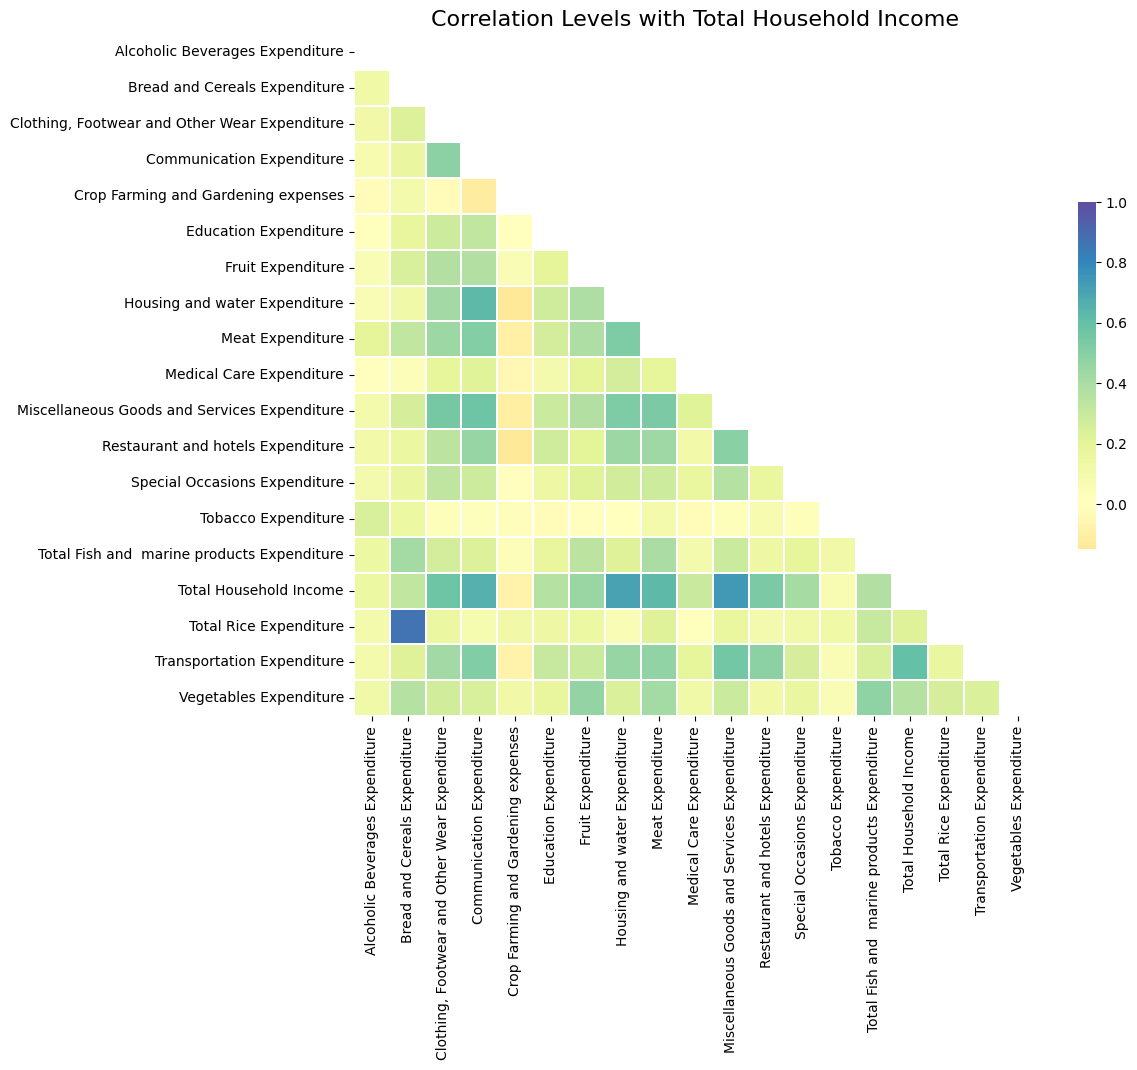

In [60]:

#Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title(f"Correlation Levels with {target_column}", fontsize=16)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="Spectral", vmax=1, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5})

plt.show()

Seeing if masking worked

In [54]:
continous_df_no_outliers.head()

,Total Household Income,Region,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,...,Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,latitude,longitude
0,480332,CAR,42140,38300,24676,16806,3325,13460,3000,0,...,63636,3457,4776,2880,36200,34056,7200,19370,16.4023,120.596
1,198235,CAR,17329,13008,17434,11073,2035,7833,2360,960,...,41370,3520,12900,5700,29300,9150,1500,0,16.4023,120.596
2,82785,CAR,34182,32001,7783,2590,1730,3795,4545,270,...,14340,70,324,420,425,6450,500,0,16.4023,120.596
3,107589,CAR,34030,28659,10914,10812,690,7887,6280,480,...,16638,60,6840,660,300,3762,500,15580,16.4023,120.596
4,189322,CAR,34820,30167,18391,11309,1395,11260,6400,1040,...,31122,140,6996,2100,0,8472,1000,18887,16.4023,120.596


## Spatial Autocorrelation Analysis 
### what is autocorrelation?
> Autocorrelation (also called serial correlation) refers to the correlation of a   
> variable with itself over successive time intervals or spatial locations.   

> It measures how the value of a variable at one point in time (or space)  
> is related to its values at other points in time (or space). 

### Why does autocorrelation matter in predictive models?
> Assumption violations:  
>> Many predictive models (e.g., linear regression) assume that     
>> residuals (errors) are independent of each other. Autocorrelation violates this assumption,   
>> which can lead to biased estimates and incorrect conclusions. 

> Predictive power:  
>> Autocorrelation can indicate patterns in the data, which may be useful for model building.  
>> For example, in time-series modeling, autocorrelation can help determine how past values influence future values.  


### Now, Spatial Autocorrelation  
> Spatial autocorrelation is a specific type of autocorrelation that occurs when  
> the values of a variable at one location are correlated with values at nearby locations.  
> It measures the degree to which a spatial phenomenon is similar to itself across space.  

- Positive spatial autocorrelation: Nearby locations have similar values.  
 For instance, if high-income households are clustered in a neighborhood, this shows positive spatial autocorrelation.

 
- Negative spatial autocorrelation: Nearby locations have dissimilar values.  
 For example, if rich and poor neighborhoods alternate, this shows negative spatial autocorrelation.

### Why does this matter?  
>  If spatial autocorrelation exists, it indicates that spatial structure plays a role in the variable being analyzed. Ignoring it could lead to biased predictions or incorrect inferences.  



#### Geographic Data can Imply autocorrelation   
> This means nearby locations tend to have more similar characteristics, which violates traditional regression assumptions.   
#### Picking the right model   
> It means that we have to pick a model that addresses this. So we have to use Spatial Regression Models.


In [55]:
import libpysal
import esda

# Create spatial weights matrix
coords = continous_df_no_outliers[['longitude', 'latitude']].values
w = libpysal.weights.KNN.from_array(coords, k=5)  # 5 nearest neighbors

c:\Python312\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [56]:
# Moran's I test for Total Household Income
moran = esda.moran.Moran(continous_df_no_outliers['Total Household Income'], w)

print("Moran's I Statistic:", moran.I)
print("p-value:", moran.p_sim)

# Interpretation:
# - Moran's I ranges from -1 to 1
# - Positive values indicate clustering
# - Negative values indicate dispersion
# - Close to 0 suggests random spatial distribution

Moran's I Statistic: 0.08038146177423071
p-value: 0.001


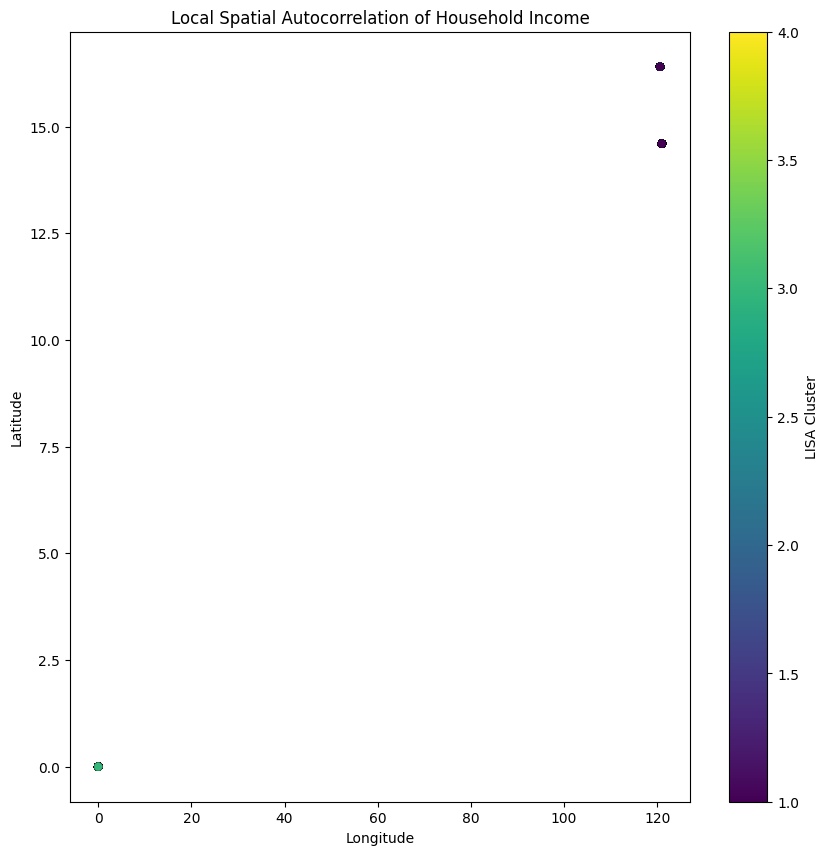

In [57]:
# Local Indicators of Spatial Association (LISA)
lisa = esda.moran.Moran_Local(
    continous_df_no_outliers['Total Household Income'], w)

# Plotting LISA Cluster Map
plt.figure(figsize=(10, 10))
plt.scatter(continous_df_no_outliers['longitude'], continous_df_no_outliers['latitude'],
            c=lisa.q,
            cmap='viridis',
            edgecolor='black',
            linewidth=0.1)
plt.colorbar(label='LISA Cluster')
plt.title('Local Spatial Autocorrelation of Household Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# LISA Quadrants Interpretation:
# 1: High-High Clusters (wealthy regions near wealthy regions)
# 2: Low-Low Clusters (poor regions near poor regions)
# 3: High-Low Outliers
# 4: Low-High Outliers

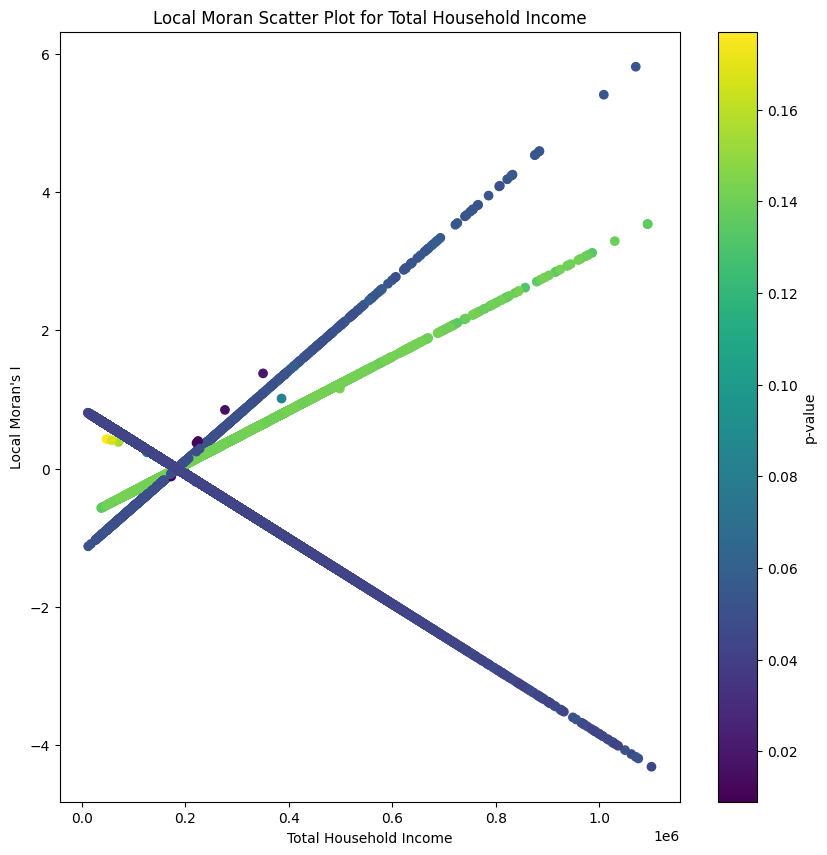

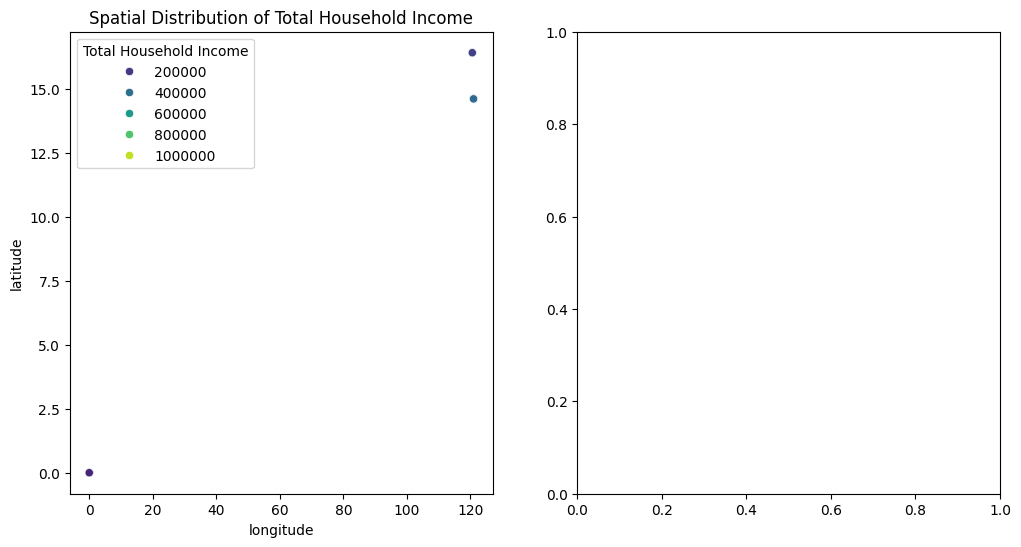

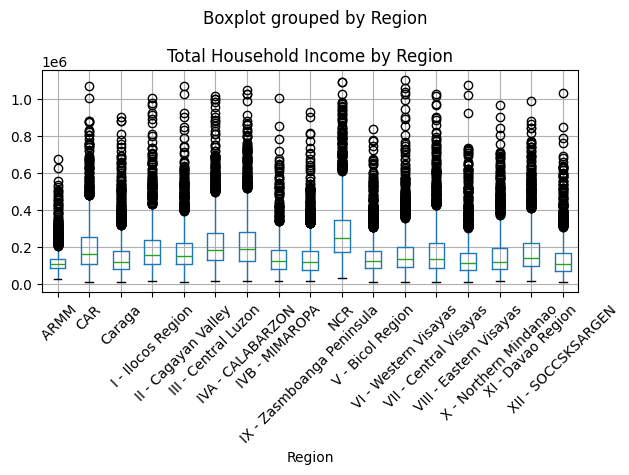

Spatial Autocorrelation Analysis Results:
Moran_I: 0.08038146177423071
p_value: 0.001
z_score: 73.64456330046386


In [73]:

# Top 5 features.
selected_features = [
    'Miscellaneous Goods and Services Expenditure', 'Housing and water Expenditure',
    'Communication Expenditure', 'Meat Expenditure',
    'Transportation Expenditure']

local_moran = esda.moran.Moran_Local(
    continous_df_no_outliers['Total Household Income'], w)

# Visualization of Local Moran's I
plt.figure(figsize=(10, 10))
# Use scatter plot instead of non-existent .plot() method
plt.scatter(continous_df_no_outliers['Total Household Income'], local_moran.Is,
            c=local_moran.p_sim, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Total Household Income')
plt.ylabel('Local Moran\'s I')
plt.title('Local Moran Scatter Plot for Total Household Income')
plt.show()

# Prepare results
results = {
    'Moran_I': moran.I,
    'p_value': moran.p_sim,
    'z_score': moran.z_sim
}

# Visualization of spatial distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=continous_df_no_outliers, x='longitude', y='latitude',
                hue='Total Household Income', palette='viridis')
plt.title('Spatial Distribution of Total Household Income')

plt.subplot(1, 2, 2)
continous_df_no_outliers.boxplot(
    column='Total Household Income', by='Region')
plt.title('Total Household Income by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Spatial Autocorrelation Analysis Results:")
for key, value in results.items():
    print(f"{key}: {value}")